1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
from scipy import integrate
import seaborn as sns

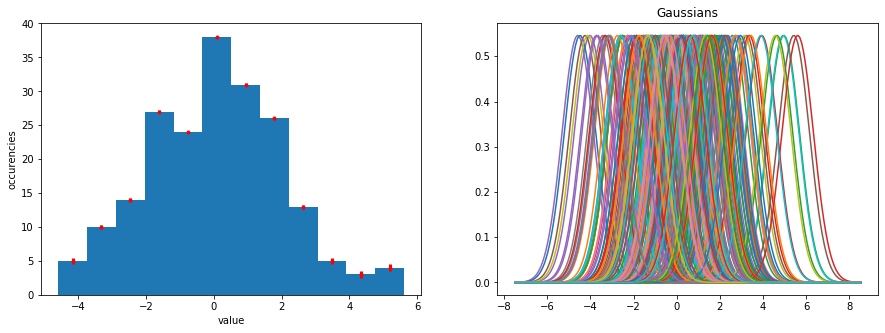

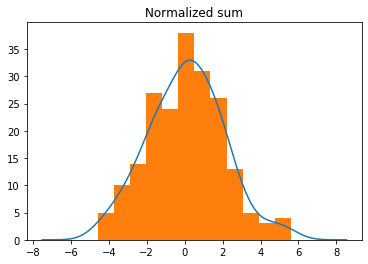

In [72]:
N = 200
mean = 0
sd = 2

fig = plt.figure(figsize=(15,5))
plt1 = fig.add_subplot(1, 2, 1)

x = np.random.normal(mean,sd,N)
n,bins,_ = plt1.hist(x, 6*sd)
m = np.max(bins[0])

#plt1.set_yticks(range(0,int(m)+2,2))
plt1.tick_params(which='major');
plt1.set_ylabel('occurencies')
plt1.set_xlabel('value')
bins_c = 0.5*(bins[1:]+bins[:-1])
plt1.errorbar(bins_c, n, yerr=1/(n**0.5), fmt='r.', ecolor='r', elinewidth=3)

std = 1.06 * x.std() * x.size**(-0.2)
rangex = np.linspace(np.min(x) - 4*std, np.max(x) + 4*std, N)
gaus = [st.norm.pdf(rangex, i, std) for i in x ]
plt2 = fig.add_subplot(1, 2, 2)
for g in gaus:
    plt2.plot(rangex,g)
plt2.set_title("Gaussians")
plt.show()

gaus_sum = np.sum(gaus,axis=0)
gaus_sum_norm = gaus_sum / integrate.trapz(gaus_sum,rangex) * N * (bins[1]-bins[0])
plt.plot(rangex, gaus_sum_norm)
plt.hist(x, 6*sd)
plt.title("Normalized sum")
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

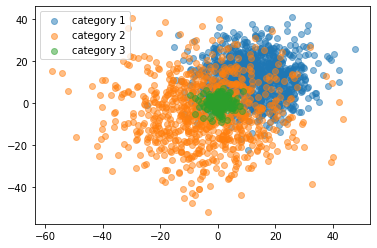

In [87]:
def generate_category(n, m, std):
    points = np.array([np.random.normal(m, std, n), np.random.normal(m, std, n)])
    return points

def generate_dataset(c, n, m, std):
    gaus = []
    for i in range(cat):
        g = generate_category(samples[i], means[i], stds[i])
        gaus.append(g)    
    return gaus

cat = 3
samples = [1000, 800, 200]
means = [12, -5, 0]
stds = [10, 15, 3]

gaus = generate_dataset(3, samples, means, stds)

for j,g in enumerate(gaus):
    l = 'category ' + str(j+1) 
    plt.scatter(g[0,:], g[1,:], label=l, alpha=0.5)
plt.legend()
plt.show()

In [17]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

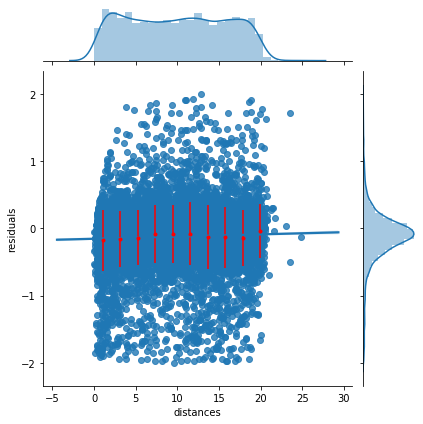

In [86]:
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
df = df[df['residuals'].abs() < 2]
df.head()
slope, intercept, _, _, stderr = st.linregress(df['residuals'], df['distances'])
sns.jointplot(x='distances', y='residuals', data=df, kind="reg");

n=10
bins = np.linspace(0, 21, n+1)
x = 0.5*(bins[1:]+bins[:-1])
y = []
erry = []

for i in range(n):
    df2 = df[df['distances']> bins[i]]
    df2 = df2[df2['distances']< bins[i+1]]
    y.append(np.mean(df2['residuals']))
    erry.append(np.std(df2['residuals']))

plt.errorbar(x,y,erry,0, fmt='r.');